In [408]:
from ppadb.client import Client as AdbClient
client = AdbClient()
device = client.device("79dadda0")

def get_screenshrot():
    result = device.screencap()
    with open("screen.png", "wb") as fp:
        fp.write(result)

get_screenshrot()

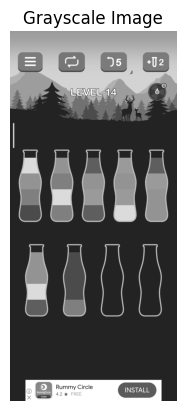

In [409]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('screen.png')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Display the grayscale image
plt.imshow(gray, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()


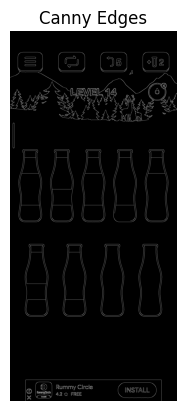

In [410]:
# Apply Canny edge detection
edges = cv2.Canny(gray, 100, 200)

# Display the Canny edges
plt.imshow(edges, cmap='gray')
plt.title('Canny Edges')
plt.axis('off')
plt.show()


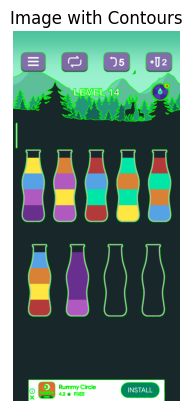

In [411]:
# Find contours
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on the original image
contour_image = image.copy()
cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)

# Display the image with contours
plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
plt.title('Image with Contours')
plt.axis('off')
plt.show()


Total number of tube 9


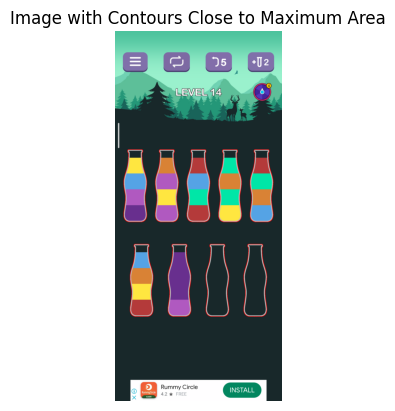

In [412]:
# Sort contours by area
sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)

# Get the maximum area contour
max_area_contour = sorted_contours[0]
max_area = cv2.contourArea(max_area_contour)

# Filter contours within ±5% of the maximum area
selected_contours = []
for contour in sorted_contours:
    area = cv2.contourArea(contour)
    if 0.95 * max_area <= area <= 1.05 * max_area:
        selected_contours.append(contour)
print(f"Total number of tube {len(selected_contours)}")


# Draw contours on the original image
contour_image = image.copy()
cv2.drawContours(contour_image, selected_contours, -1, (0, 0, 255), 2)

# Display the image with contours
plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
plt.title('Image with Contours Close to Maximum Area')
plt.axis('off')
plt.show()

tubes coodinates [(56, 769), (260, 769), (464, 769), (669, 769), (873, 769), (97, 1382), (342, 1382), (587, 1382), (832, 1382)]
following are the color coodinate tube
[[(126, 792), (126, 869), (126, 969), (126, 1069), (126, 1169)], [(330, 792), (330, 869), (330, 969), (330, 1069), (330, 1169)], [(534, 792), (534, 869), (534, 969), (534, 1069), (534, 1169)], [(739, 792), (739, 869), (739, 969), (739, 1069), (739, 1169)], [(943, 792), (943, 869), (943, 969), (943, 1069), (943, 1169)], [(167, 1405), (167, 1482), (167, 1582), (167, 1682), (167, 1782)], [(412, 1405), (412, 1482), (412, 1582), (412, 1682), (412, 1782)], [(657, 1405), (657, 1482), (657, 1582), (657, 1682), (657, 1782)], [(902, 1405), (902, 1482), (902, 1582), (902, 1682), (902, 1782)]]


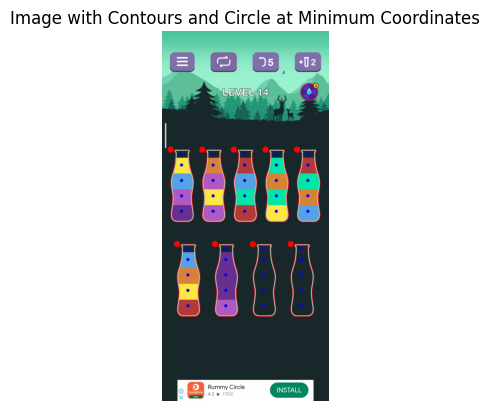

In [413]:
# Find the minimum x and y coordinates of the contours
contour_image_with_circle = contour_image.copy()

for contour in selected_contours:
    min_x = contour[:, :, 0].min()
    min_y = contour[:, :, 1].min()
    cv2.circle(contour_image_with_circle, (min_x, min_y), 20, (0, 0, 255), -1)

# sort on x axis 
tubes_cood = []
def sort_key_x(coord):
    return coord[0]

for contour in selected_contours:
    min_x = contour[:, :, 0].min()
    min_y = contour[:, :, 1].min()
    tubes_cood.append((min_x,min_y))
tubes_cood = sorted(tubes_cood, key=sort_key_x)
# sort tube on y axiz
def sort_key_y(coord):
    return coord[1]
tubes_cood = sorted(tubes_cood, key=sort_key_y)

print(f"tubes coodinates {tubes_cood}")

# get the coodinate fo colors in tube make circle around it and also store it in new list 
tubes_color=[]
for tube in tubes_cood:
    tube_color_coodinates = []

    # append upper most empty coodinate to check if tube is empty 
    tube_color_coodinates.append((tube[0]+70 , tube[1]+23))
    cv2.circle(contour_image_with_circle, (tube[0]+67,tube[1]+30 ), 10, (255, 0, 0), -1)

    for i in range(1,5):
        color_cood_x = tube[0] + 70
        color_cood_y = tube[1] + 100 * i

        # store coodinate for fetching its color 
        tube_color_coodinates.append((color_cood_x,color_cood_y))
        # Draw a circle at the minimum coordinates
        cv2.circle(contour_image_with_circle, (color_cood_x, color_cood_y), 10, (255, 0, 0), -1)
    tubes_color.append(tube_color_coodinates)

print("following are the color coodinate tube")
print(tubes_color)

# Display the image with contours and circle
plt.imshow(cv2.cvtColor(contour_image_with_circle, cv2.COLOR_BGR2RGB))
plt.title('Image with Contours and Circle at Minimum Coordinates')
plt.axis('off')
plt.show()


In [414]:

#print("following are the color coodinate of tube")
#print(tubes_color)
'''
for i in range(len(tubes_color)) :
    print(f"\nTube {i}"  )
    for color_coodinates in tubes_color[i]:
         print("Cood",color_coodinates , end=" ")
         print()
'''

tubes_water_color =[]
for i in range(len(tubes_color)) :
    tube_water_color = []
    for color_cood in tubes_color[i]:
        tube_water_color.append(tuple(image[color_cood[1],color_cood[0]])) # store the color of tube water
    tubes_water_color.append(tube_water_color)



print("color of water in tubes")
for tube in tubes_water_color :
    print(tube)


color of water in tubes
[(42, 40, 24), (64, 230, 255), (229, 163, 85), (192, 89, 176), (142, 47, 104)]
[(42, 40, 24), (53, 130, 217), (192, 89, 176), (64, 230, 255), (192, 89, 176)]
[(42, 40, 24), (58, 58, 180), (229, 163, 85), (167, 230, 0), (58, 58, 180)]
[(42, 40, 24), (167, 230, 0), (53, 130, 217), (167, 230, 0), (64, 230, 255)]
[(42, 40, 24), (58, 58, 180), (167, 230, 0), (53, 130, 217), (229, 163, 85)]
[(42, 40, 24), (229, 163, 85), (53, 130, 217), (64, 230, 255), (58, 58, 180)]
[(42, 40, 24), (142, 47, 104), (142, 47, 104), (142, 47, 104), (192, 89, 176)]
[(42, 40, 24), (42, 40, 24), (42, 40, 24), (42, 40, 24), (42, 40, 24)]
[(42, 40, 24), (42, 40, 24), (42, 40, 24), (42, 40, 24), (42, 40, 24)]


In [415]:
# Convert the colors in tubes_water_color to alphabets

for i in range(len(tubes_water_color[0])):
    print()
    for j  in range(len(tubes_water_color)):
        print(f"\033[38;2;{tubes_water_color[j][i][2]};{tubes_water_color[j][i][1]};{tubes_water_color[j][i][0]}m\033[0m" , end="  ") # open cv uses GBR not RGB so map color acordenly
        

for tube_colors in tubes_water_color:
    for color in tube_colors:
        #print(f"\033[38;2;{color[2]};{color[1]};{color[0]}m\033[0m") # open cv uses GBR not RGB so map color acordenly
        pass



                  
                  
                  
                  
                  

Now convert the given rgb to some char which need not to represent color

In [416]:
# get unique colors in the tubes
unique_color = set()
for tube_colors in tubes_water_color:
    unique_color = unique_color.union(set(tube_colors))

for color in unique_color:
    print(f"\033[38;2;{color[2]};{color[1]};{color[0]}m\033[0m {color}" ) 

#Give colors a identifyer

color_matrix = [] 

for tube_color in tubes_water_color:
    tube = []
    for color in tube_color:
        for index , color_ in enumerate(unique_color):
            if color ==  color_ :
                tube.append(index)
    color_matrix.append(tube)

print("\nColor matrix")
for i in range(len(color_matrix[0])):
    for j in range(len(color_matrix)):
        print(color_matrix[j][i],end=" ")
    print()

 (229, 163, 85)
 (64, 230, 255)
 (192, 89, 176)
 (53, 130, 217)
 (58, 58, 180)
 (142, 47, 104)
 (167, 230, 0)
 (42, 40, 24)

Color matrix
7 7 7 7 7 7 7 7 7 
1 3 4 6 4 0 5 7 7 
0 2 0 3 6 3 5 7 7 
2 1 6 6 3 1 5 7 7 
5 2 4 1 0 4 2 7 7 


In [417]:
tube_info=[]
tube_matrix=[]

for i in range(len(color_matrix)):
    if color_matrix[i][0] == color_matrix[i][-1]: # if first and last color are same (first color is always of empty tube)
        tube_matrix.append([]) # append empty tube
    else:
        tube = []
        for j in range(1,len(color_matrix[0])):
            if color_matrix[i][j] != color_matrix[i][0]: # if color is not of empty type
                tube.append(color_matrix[i][j])
        tube_matrix.append(tube)

print(tube_matrix)



[[1, 0, 2, 5], [3, 2, 1, 2], [4, 0, 6, 4], [6, 3, 6, 1], [4, 6, 3, 0], [0, 3, 1, 4], [5, 5, 5, 2], [], []]


# Solver (backtracking)

In [418]:
import copy
def get_valid_moves(mat):
    valid_moves = []
    for i in range(len(mat)):
        for j in range(len(mat)):
            if i == j :
                continue
            elif len(mat[i]) == 0 and len(mat[j]) == 0:
                continue
            elif len(mat[i]) == 0 :
                continue
            elif len(mat[j]) == 0 :
                valid_moves.append((i,j))
            elif len(mat[j]) == 4:
                continue
            elif mat[i][0] == mat[j][0]: # fi top element are same
                valid_moves.append((i,j))
            
    return valid_moves

def is_solved(matrix):
    for tube in matrix:
        if not tube:  # If tube is empty it might be solved now check for other tubes
            continue
        if len(tube) == 4 and all(element == tube[0] for element in tube):
            continue
        return False
    return True

def make_move(matrix, move):
    temp = copy.deepcopy(matrix)
    i, j = move
    while temp[i] and (not temp[j] or temp[i][0] == temp[j][0]) and len(temp[j]) < 4:
        element = temp[i].pop(0)
        temp[j].insert(0, element)
    return temp

def print_matrix(list1):
    for i in range(len(list1)):
        for j in range(len(list1[i])):
            print(list1[i][j], end=" ")
        print()
    print('---')

def filter_moves(matrix , moves):
    # remove moves in which one tube is solved and ther is empty and it just stuck and pore liquid into each other
    moves_ = []
    for move in moves:
        i , j = move
        if len(matrix[j]) == 0 and all(element == matrix[i][0] for element in matrix[i]):
            continue
        elif len(matrix[i]) == 0 and all(element == matrix[j][0] for element in matrix[j]):
            continue
        else:
            moves_.append(move)
    return moves_

def dfs(matrix, path=[]):
    if is_solved(matrix):
        print("Matrix escaped!")
        # print("Path to solution:", path)
        return path
    valid_moves = get_valid_moves(matrix)
    valid_moves = filter_moves(matrix, valid_moves)
    if not valid_moves:
        print("No valid moves left!")
        return None
    for move in valid_moves:
        temp = make_move(matrix, move)
        result = dfs(temp, path + [move])
        if result:
            return result
sol = dfs(tube_matrix)
print(sol)


RecursionError: maximum recursion depth exceeded

In [ ]:
import time
print(tubes_cood)

#taps = [tubes_cood[8]]
for tap in sol:
    source , dest = tap
    device.shell(f"input tap {tubes_cood[source][0]+80} {tubes_cood[source][1]+100}")
    time.sleep(0.1)
    device.shell(f"input tap {tubes_cood[dest][0]+80} {tubes_cood[dest][1]+100}")
    time.sleep(1.9)

[(56, 769), (260, 769), (464, 769), (669, 769), (873, 769), (97, 1382), (342, 1382), (587, 1382), (832, 1382)]


KeyboardInterrupt: 